

<center>Rencontre Polytechnique - Enseignants du secondaire</center>
<center>Lucas Gerin <a href="mailto:lucas.gerin@polytechnique.edu">(écrire)</a></center>

# Un exemple de modélisation et simulation probabiliste

Cette session se place dans le contexte suivant :
* Terminale Voie Générale (Mathématiques Expertes)
 - Graphes et matrices
   * Chaîne de Markov à deux ou trois états. Distribution initiale, représentée par une
matrice ligne $\pi_0$ . Matrice de transition, graphe pondéré associé.
   
Nous allons traiter expérimentalement et théoriquement un modèle mathématique issu de la vie réelle : le problème des arrondis de monnaie au Canada. L'objectif est de présenter une démarche de recherche assez proche de ce qui se fait en Mathématiques Appliquées.

## Sommaire

- [Le problème : arrondis de monnaie au Canada](#Probleme)
 * [Le modèle probabiliste](#Modele)
 * [Simulations préliminaires : les variables $X_n$](#Simulations)
- [Expérimentation : simulations de $R_N$](#Experimentation)
- [Calcul des probabilités : utilisation des matrices de transition](#Matrices)

In [1]:
# Cette cellule sert à faire un bel affichage du notebook 
from IPython.core.display import HTML
def css_styling():
    styles = open("./style/custom2.css").read()
    return HTML(styles)
css_styling()


In [2]:
# On charge les librairies Python

import matplotlib.pyplot as plt # Pour tracer des graphiques
import numpy as np              # Pour faire des maths

# Cette commande demande que les sorties graphiques soient dans la fenêtre principale
%matplotlib inline   


In [3]:
# Librairies spéciales pour pouvoir créer des boutons interactifs ("widgets")
from ipywidgets import widgets
from ipywidgets import interact
from IPython.display import display


<a id="Probleme"></a>
# Le problème : arrondis de monnaie au Canada

En 2012, le Canada a décidé d'arrêter la production et simulation des pièces de $1$ cent. Toutefois il est possible de proposer des prix au cent près, la règle en vigueur pour un paiement en espèce est alors un arrondi au multiple de cinq cents le plus proche.

<center>
<img src="./figures/PennyGraph02_f.jpg" style="width: 600px;"/>
    <i>(Source : Ministère des Finances Canada)</i>
</center>

**Attention :** La règle essentielle pour ce qui suit est que lorsqu'un paiement concerne plusieurs produits, l'arrondi se fait sur la somme finale :

<center>
<img src="./figures/PennyGraph01_f.jpg" style="width: 600px;"/>
    <i>(Source : Ministère des Finances Canada)</i>
</center>

Les questions que l'on se pose sont justement liées au cas des paniers avec beaucoup de produits :

* **Question 1 :** Est-ce que de manière générale cette règle est plutôt favorable ou défavorable aux clients? (Est-ce que l'on gagne plus ou moins souvent $1$ ou $2$ cents que l'on en perd?)
* **Question 2 :** Est-il possible (pour un supermarché par exemple) de tricher en faisant en sorte que la plupart du temps l'arrondi profite au magasin (c'est-à-dire que la plupart des montants finissent par $3,4,8,9$).

On voit que ces questions sont mathématiquement assez mal posées, il nous faut donc un modèle. Nous avons choisi un modèle probabiliste.

<a id='Modele'></a>
## Le modèle probabiliste

#### Notations
On suppose qu'un client achète $N$ produits, et pour $1\leq n\leq N$ on note $X_n$ ce qui nous intéresse: le deuxième chiffre après la virgule du produit $n$.

Finalement, l'arrondi se produit sur le deuxième chiffre (noté $R_N$) après la virgule dans $X_1 +\dots +X_n$, c'est-à-dire
$$
R_N=X_1 +\dots +X_N \text{ mod }10.
$$
<br>
<i>(Si par exemple un client achète $N=2$ produits à $3,74$</i>\$<i> et $11,68$</i>\$<i> alors on a</i>
$ R_2=4+8 \text{ mod }10=2$.)

* Si $R_N\in\{1,2,6,7\}$, l'arrondi est favorable au client,
* Si $R_N\in\{3,4,8,9\}$, l'arrondi est favorable au supermarché,


#### Hypothèses

On suppose que les $X_i$ sont des variables aléatoires indépendantes et ont toutes la même loi. Pour tout $r=0,1,\dots, 9$ on note
$$
p_r = \mathbb{P}(X_n=r).
$$
(Remarquons que ce nombre ne dépend pas de $n$ car les $X_n$ ont même loi.)

Une rapide étude de marché (Source : <a href="https://www.walmart.ca/fr">Catalogue de jouet de Walmart Canada</a>) nous a donné les estimations suivantes sur $127$ jouets :
$$
p_0 = 0.071, \quad
p_1 = 0.087, \quad
p_2 = 0.087, \quad
p_3 = 0.024, \quad
p_4 = 0.071, \quad
p_5 = 0.055, \quad
p_6 = 0.047, \quad
p_7 = 0.346, \quad
p_8 = 0.047, \quad
p_9 = 0.165, \quad
$$

<div markdown=1 class="Rmk"> On voit en particulier que les derniers chiffres ne sont pas du tout uniformes : les $p_r$ sont très différent. Je m'attendais personnellement à avoir $p_9$ beaucoup plus grand, mais c'est étrangement $7$ qui est le chiffre le plus courant.<br>
En tout cas, si on achète un seul produit, la règle est favorable au client! En effet
$$
p_1+p_2+p_6+p_7=0.567
$$
alors que
$$
p_3+p_4+p_8+p_9=0.307
$$

In [4]:
# -------------------------------
# Cette cellule sera retirée de la version finale
# -------------------------------

PrixRegroupes = [9,11,11,3,9,7,6,44,6,21]

PrixUnitaires=[]
for r in range(10):
    for n in range(PrixRegroupes[r]):
        PrixUnitaires.append(r)

print(PrixUnitaires)        
        
PrixRenormalises=np.round(PrixRegroupes/(np.sum(PrixRegroupes)+0.0),3)
print(PrixRenormalises)

for i in range(len(PrixRenormalises)):
    print('p_'+str(i)+' = '+str(PrixRenormalises[i])+', \quad')
    
print(np.sum(PrixRenormalises))

print([PrixRenormalises[1]+PrixRenormalises[2]+PrixRenormalises[6]+PrixRenormalises[7]])
print([PrixRenormalises[3]+PrixRenormalises[4]+PrixRenormalises[8]+PrixRenormalises[9]])

[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9]
[ 0.071  0.087  0.087  0.024  0.071  0.055  0.047  0.346  0.047  0.165]
p_0 = 0.071, \quad
p_1 = 0.087, \quad
p_2 = 0.087, \quad
p_3 = 0.024, \quad
p_4 = 0.071, \quad
p_5 = 0.055, \quad
p_6 = 0.047, \quad
p_7 = 0.346, \quad
p_8 = 0.047, \quad
p_9 = 0.165, \quad
1.0
[0.56699999999999995]
[0.30700000000000005]


Voici les valeurs saisies dans une liste python :

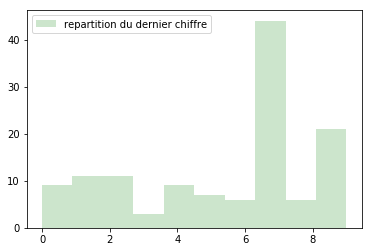

In [5]:
PrixUnitaires=[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9]

DistributionWalmart=[0.071 , 0.087 , 0.087 , 0.024 , 0.071 , 0.055 , 0.047 , 0.346 , 0.047 , 0.165]

plt.hist(PrixUnitaires, bins= 10,  facecolor='g', alpha=0.2,label='repartition du dernier chiffre') # Histogramme normalise
plt.legend(loc='best')
plt.show()

#### Reformulation mathématique du problème

* **Question 1**. Si $N$ est grand, et que les valeurs des $(p_r)_{0\leq r\leq 9}$ sont comme ci-dessus, que peut-on dire de la variable aléatoire $R_N$? En particulier, est-ce qu'elle prend plus souvent les valeurs $1,2,6,7$ ou $3,4,8,9$?
* **Question 2** Existe-t-il un choix de valeurs pour $(p_r)_{0\leq r\leq 9}$ qui fasse en sorte que
$R_N$ prenne plus souvent les valeurs $3,4,8,9$?

Pour répondre à ces questions nous allons :
1. Simuler un grand nombre de panier d'achats et représenter des histogrammes des valeurs $R_N$ correspondantes.
2. Calculer de façon exacte la loi de $R_N$, à l'aide d'un graphe pondéré et d'une matrice de transition.

<a id='Simulations'></a>
## Simulations préliminaires : variables $X_1,\dots,X_N$

On cherche à définir une fonction `TiragePrix(Distribution)` qui prenne en entrée la liste des distributions des prix (par exemple on peut l'appliquer à `DistributionWalmart`) et qui renvoie à chaque tirage des variables $X$ tirées selon la distribution `Distribution`.

Pour cela nous allons utiliser une variable aléatoire continue uniforme $U$ dans l'intervalle $[0,1]$. L'idée est alors de renvoyer $X=r$, où $r$ est l'unique valeur dans $\{0,1,\dots, 9\}$ telle que
$$
p_0+\dots +p_{r-1} < U\leq p_0+\dots +p_{r}.
$$
Cette méthode est illustrée dans la figure ci-dessous :

<center>
<img src="./figures/SimulationUniforme.jpg" style="width: 600px;"/>
</center>
Pour simuler $U$ nous allons utiliser la fonction `np.random.rand()` de python qui ne prend aucun argument en entrée, et renvoie une variable aléatoire continue uniforme dans l'intervalle $[0,1]$.

In [6]:
def TiragePrix(Distribution):
    # entrée : vecteur "Distribution" =[p_0,p_1,p_2,...,p_9] de probabilités
    # sortie : tirage d'une variable X de loi "Distribution".
    VariableUniforme=np.random.rand()
    ProbasCumulees=np.cumsum(Distribution)  # fabrique le vecteur [p_0,p_0+p_1,p_0+p_1+p_2,...]
    X=0   # X sera l'entier qu'on renvoie à la fin
    r=0   # r =0,1,...,9 désigne l'indice pour parcourir le vecteur "Distribution"
    while VariableUniforme>ProbasCumulees[r]:
        # on parcourt ProbasCumulees jusqu'a tomber dans le bon intervalle
        X=X+1
        r=r+1
    return X

# test
Test=[]
for n in range(15):
    Test.append(TiragePrix(DistributionWalmart))

print(Test)


[8, 1, 5, 4, 2, 2, 9, 9, 7, 9, 7, 0, 7, 8, 5]


### Visualiser des tirages de $X$

On commence par simuler les paniers de $C$ clients qui achètent un produit selon la distribution `DistributionDesPrix`, et on représente les résultats dans un histogramme.<br>
Autrement dit, on tire au sort $C$ fois la variable $X$.

In [7]:

def HistogrammeDesPrix(C):
    ListePrix=[TiragePrix(DistributionWalmart) for p in range(C)]
    plt.hist(ListePrix, bins= 10,  facecolor='g', alpha=0.2) # Histogramme normalise
    plt.title('Tirages de C ='+str(C)+' prix suivant la distribution de Walmart')
    plt.show()
    
interact(HistogrammeDesPrix,C=(1,2000,50))  # On lance la fonction avec un "widget" pour choisir a

interactive(children=(IntSlider(value=951, description='C', max=2000, min=1, step=50), Output()), _dom_classes…

<function __main__.HistogrammeDesPrix(C)>

<a id='Experimentation'></a>
## Expérimentation : simulation de $R_N$

On peut maintenant faire des expériences aléatoires pour essayer de répondre aux Questions 1 et 2. Pour cela on va considérer $C$ clients qui achètent chacun $N$ produits. On va représenter les $C$ valeurs de $R_N$ dans un histogramme.

In [8]:
def TirageR(N,Distribution):
    # entrée : entier N , vecteur de probabilités "Distribution" de taille 10
    # sortie : Tirage d'une variable aléatoire R_N
    Tirages=[TiragePrix(Distribution) for n in range(N)]
    SommeDesPrix=np.sum(Tirages)
    return SommeDesPrix%10


In [9]:
DistributionWalmart=[0.071 , 0.087 , 0.087 , 0.024 , 0.071 , 0.055 , 0.047 , 0.346 , 0.047 , 0.165]
#Test de triche 
DistributionTriche=[0 , 0 , 0 , 0.1 , 0.1 , 0 , 0 , 0 , 0 , 0.8]

def HistogrammeDesR(C,N):
    ListePrix=[TirageR(N,DistributionWalmart) for c in range(C)]
    plt.hist(ListePrix, bins= 10,  facecolor='g', alpha=0.2) # Histogramme normalise
    plt.title('Valeurs de R pour C ='+str(C)+' clients qui achetent chacun N = '+str(N)+' produits')
    plt.show()
    
interact(HistogrammeDesR,C=(2000,3000,100),N=(1,30,1))  # On lance la fonction avec un "widget" pour choisir C,N

interactive(children=(IntSlider(value=2500, description='C', max=3000, min=2000, step=100), IntSlider(value=15…

<function __main__.HistogrammeDesR(C, N)>

<div markdown=1 class="Rmk"> On observe que pour très peu de produits (dès $N=4$ ou $5$), la distribution de $R_N$ semble uniforme.

On peut donc essayer de démontrer le résultat suivant :

<div markdown=1 class="Thm"> Pour toute distribution des prix $(p_r)_{0\leq r\leq 9}$, la variable aléatoire $R_N$ converge vers la loi uniforme lorsque le nombre de produits tend vers l'infini :
$$
\forall r\in\{0,1,\dots, 9\},\qquad \mathbb{P}(R_N=r) \stackrel{N\to +\infty}{\to} \frac{1}{10}.
$$

<a id='Matrices'></a>
## Calcul des probabilités : utilisation des matrices de transition

Nous allons adopter un point de vue un peu différent sur ce problème. Au lieu de faire des simulations nous allons calculer explicitement, pour une distribution donnée $(p_r)_{0\leq r\leq 9}$ et un entier $N$, les probabilités
$$
\mathbb{P}(R_N=r).
$$
L'objectif est de confirmer numériquement la convergence vers $1/10$.

### Matrice de transition associée à la suite $(R_n)$

Ce calcul va se faire en utilisant des <i>matrices de transition</i>. Pour cela on remarque que la suite $R_n$ peut être représentée comme une marche aléatoire sur le <i>graphe orienté pondéré</i> suivant (on ne représente que 3 arêtes) :

<center>
<img src="./figures/MarcheCercle.jpg" style="width: 450px;"/>
</center>

En effet, si $R_n=2$ pour un certain $n$, alors $R_{n+1}=7$ si $X_{n+1}$ finit par un $5$, ce qui arrive avec probabilité $p_5$. Plus formellement, <br>
$$
\mathbb{P}(R_{n+1}=7\ |\ R_n=2)=p_5.
$$
<br>
Plus généralement, pour tout $n\geq 0$ et tous $r,s\in\{0,1,\dots,9\}$ on a
<br>
$$
\mathbb{P}(R_{n+1}=s\ |\ R_n=r)=p_q,
$$
<br>
où $q= s-r$ modulo $10$.


La matrice de transition $Q$ associée à la suite $(R_n)$ est donc donnée par

$$
Q=
\phantom{\begin{matrix} 0 \end{matrix}}
%\begin{matrix} 0 & 1 & 2 & 3 & 4 & 5 & 6 & 7 & 8 & 9 \end{matrix}\\
\begin{matrix}
0\\ 1 \\ 2 \\ \\ \vdots \\ \\ \\ \\ \\ 9
\end{matrix}
\begin{pmatrix}
p_0 & p_1 & p_2 & \dots & & & p_9\\
p_9 & p_0 & p_1 & \dots & & & p_8\\
p_8 & p_9 & p_0 & \dots & & & p_7\\
 & & & & & & \\
 & & & & & & \\
 & &  & \vdots & & & \\
  & & & & & & \\
 & & & & & & \\
p_2 & p_3 & p_4  & \dots & & & p_1\\
p_1 & p_2 & p_3   &\dots & & & p_0\\
\end{pmatrix}.
$$

Voici le code d'une fonction qui crée la matrice Q à partir des $(p_r)$.

In [10]:
def MatriceQ(Distribution):
    # entrée : vecteur des probabilités "Distribution"
    # sortie : matrice de transition associée
    Matrice=np.zeros([10,10])
    for r in range(10):
        for s in range(10):
            Matrice[r,s]= Distribution[(s-r)%10]
    return Matrice
            
# Test
print(MatriceQ(DistributionWalmart))


[[ 0.071  0.087  0.087  0.024  0.071  0.055  0.047  0.346  0.047  0.165]
 [ 0.165  0.071  0.087  0.087  0.024  0.071  0.055  0.047  0.346  0.047]
 [ 0.047  0.165  0.071  0.087  0.087  0.024  0.071  0.055  0.047  0.346]
 [ 0.346  0.047  0.165  0.071  0.087  0.087  0.024  0.071  0.055  0.047]
 [ 0.047  0.346  0.047  0.165  0.071  0.087  0.087  0.024  0.071  0.055]
 [ 0.055  0.047  0.346  0.047  0.165  0.071  0.087  0.087  0.024  0.071]
 [ 0.071  0.055  0.047  0.346  0.047  0.165  0.071  0.087  0.087  0.024]
 [ 0.024  0.071  0.055  0.047  0.346  0.047  0.165  0.071  0.087  0.087]
 [ 0.087  0.024  0.071  0.055  0.047  0.346  0.047  0.165  0.071  0.087]
 [ 0.087  0.087  0.024  0.071  0.055  0.047  0.346  0.047  0.165  0.071]]


On dispose alors du résultat suivant :

<div markdown=1 class="Thm"> On note $(q^{(n)}_{r,s})_{0\leq r,s\leq 9}$ les coefficients de la matrice $Q^n$. Alors pour tout $n$, pour tous $r,s$ on a
$$
q^{(n)}_{r,s}=\mathbb{P}(R_n=s\ |\ R_0=s).
$$

En extrayant la $1$ère ligne de $Q^n$, on a donc les valeurs des probabilités $\mathbb{P}(R_N=r)$.

In [11]:
DistributionWalmart=[0.071 , 0.087 , 0.087 , 0.024 , 0.071 , 0.055 , 0.047 , 0.346 , 0.047 , 0.165]
#Test de triche 
DistributionTriche=[0 , 0 , 0 , 0.1 , 0.1 , 0 , 0 , 0 , 0 , 0.8]

def HistogrammeDesProbabilites(N):
    PuissanceMatrice=np.linalg.matrix_power(MatriceQ(DistributionWalmart),N)
    plt.axis([0,10,0,0.3])
    plt.plot([PuissanceMatrice[0,k] for k in range(10)], '-o')
    plt.title('Valeurs  qui achetent chacun N = '+str(N)+' produits')
    plt.show()
    
interact(HistogrammeDesProbabilites,N=(1,20,1))  # On lance la fonction avec un "widget" pour choisir N

interactive(children=(IntSlider(value=10, description='N', max=20, min=1), Output()), _dom_classes=('widget-in…

<function __main__.HistogrammeDesProbabilites(N)>

<div markdown=1 class="Rmk"> Ce calcul confirme que dès $N=5$ la distribution de $R_N$ est quasiment uniforme.

### Explication théorique (ébauche)

à faire! But : montrer que la mesure uniforme est stationnaire.
